In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout

In [16]:
print(len('/kaggle/input/plant-disease-recognition-dataset/Train/Train/Healthy'))
print(len('/kaggle/input/plant-disease-recognition-dataset/Train/Train/Powdery'))
print(len('/kaggle/input/plant-disease-recognition-dataset/Train/Train/Rust'))

67
67
64


In [18]:
train_datagen = ImageDataGenerator(rescale=1./255)            # Pixel values to [0, 1]
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/plant-disease-recognition-dataset/Train/Train',
    target_size=(150, 150),    # Resize images to 150x150 pixels
    batch_size=32,             # Number of images to be yielded from the generator per batch
    class_mode='categorical'   # 2D one-hot encoded labels
)

validation_generator = test_datagen.flow_from_directory(
    '/kaggle/input/plant-disease-recognition-dataset/Validation/Validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/plant-disease-recognition-dataset/Test/Test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [23]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , activation = 'relu' , input_shape = (150 ,150 ,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64 , (3,3) , activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128 , (3,3) , activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(3,activation = 'softmax' ))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
history = model.fit(train_generator, validation_data = validation_generator, epochs=10 )

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 134s 3s/step - accuracy: 0.3978 - loss: 1.0526 - val_accuracy: 0.4333 - val_loss: 1.0281
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.5958 - loss: 0.7742 - val_accuracy: 0.6333 - val_loss: 0.7788
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.7064 - loss: 0.6437 - val_accuracy: 0.7833 - val_loss: 0.5012
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.8231 - loss: 0.4217 - val_accuracy: 0.7667 - val_loss: 0.4779
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.8847 - loss: 0.3242 - val_accuracy: 0.8000 - val_loss: 0.7622
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.9342 - loss: 0.2101 - val_accuracy: 0.8667 - val_loss: 0.4095
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.9307 - loss: 0.1670 - val_accuracy: 0.8833 - val_loss: 0.2732
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9680 - loss: 0.1069 - val_accuracy: 0.8000 - val_loss: 1.

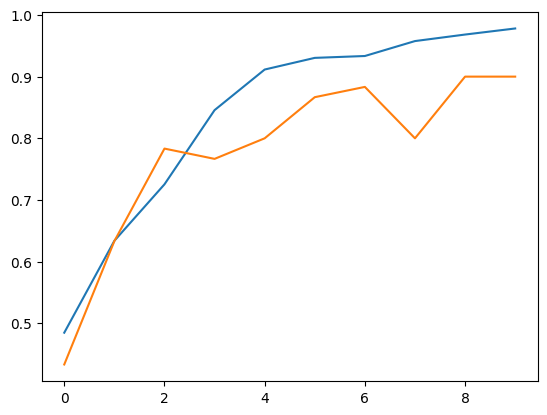

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

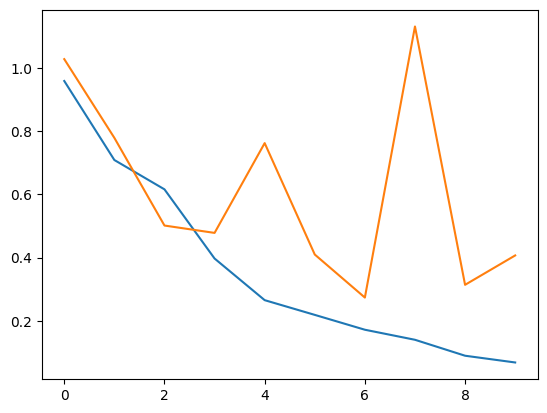

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [29]:
test_loss, test_acc = model.evaluate(test_generator)

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9369 - loss: 0.2332
